# Telecom Churn - ML Group Case Study 

Problem Statement


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate and moreover, it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
That’s why, the telecom industry wants  to build models  –

a)	to predict which customers are at high risk of churn. By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

b)	to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


For that the business objective is set as to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.


To find the prediction of the churn, we are going to find out the interpretation by the following below steps –
1.	Data Understanding and Handling Missing Data
2.	Filter High-Value-Customers (HVC) 
3.	Advance Imputation of data - to replace NaN values
4.	Derive Churn 
5.  More Steps : 
i) Derived Variables
ii) EDA
iii) Outlier Treatment 
6.	Modelling 
i)	With PCA, three models  
ii)	Without PCA, one model

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_rows',230)
pd.set_option('max_columns',230)

In [3]:
#read csv file
churn_df = pd.read_csv('telecom_churn_data.csv')

In [4]:
#checking info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Step 1: Data Understanding and Handling Missing Data

In [5]:
#checking empty data
round((100*churn_df.isnull().sum())/len(churn_df.index),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### Impute with Zero on Missing Values

In [6]:
# In the recharge columns we can impute missing values with zero
recharge_columns = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                    'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                    'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                   'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
                   'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

In [7]:
churn_df[recharge_columns].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [8]:
#Impute missing values with zero
churn_df[recharge_columns]=churn_df[recharge_columns].fillna(0)

In [9]:
#check the column data
churn_df[recharge_columns].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [10]:
#check empty data
round((100*churn_df.isnull().sum())/len(churn_df.index),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
#drop id columns and all the date columns
drop_columns_lst = ['mobile_number','circle_id','last_date_of_month_6',
                    'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                    'date_of_last_rech_9','date_of_last_rech_data_6',
                    'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

In [12]:
#drop the columns from the churn_df dataset
churn_df=churn_df.drop(drop_columns_lst,axis=1)

In [13]:
#check the dimensions after dropping
churn_df.shape

(99999, 212)

In [14]:
round((100*churn_df.isnull().sum())/len(churn_df.index),2)

loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6    

In [15]:
#checking unique values to see if the columns are categorical or not
print(churn_df['night_pck_user_6'].unique())
print(churn_df['night_pck_user_7'].unique())
print(churn_df['night_pck_user_8'].unique())
print(churn_df['night_pck_user_9'].unique())
print(churn_df['fb_user_6'].unique())
print(churn_df['fb_user_7'].unique())
print(churn_df['fb_user_8'].unique())
print(churn_df['fb_user_9'].unique())

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[nan  0.  1.]
[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]
[nan  1.  0.]


### Observation :-

### So from the above result it is clearly seen that the columns are categorical i.e. binary distribution

In [16]:
categorical_columns =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

## Impute categorical columns

[Text(0,0.5,'')]

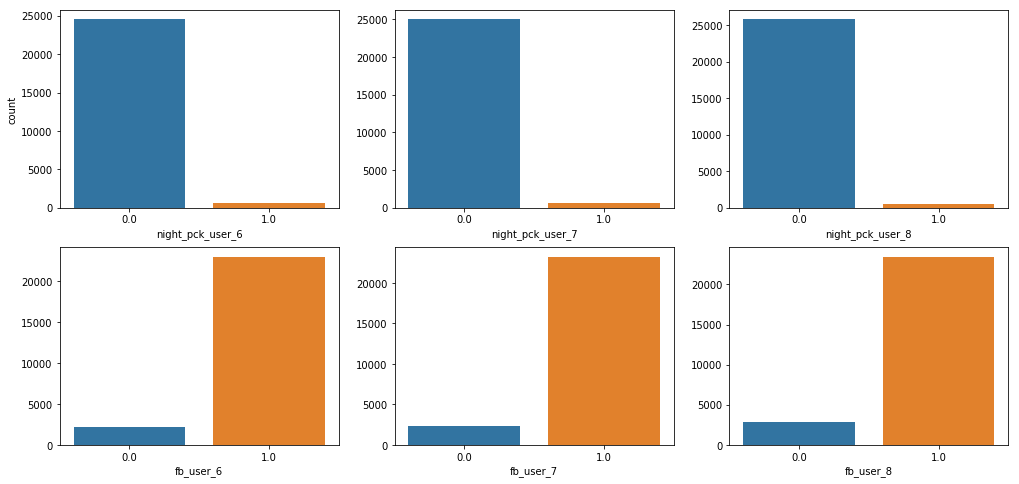

In [17]:
plt.figure(figsize=(17,8))
plt.subplot(2,3,1)
sb.countplot(churn_df['night_pck_user_6'])

plt.subplot(2,3,2)
ax=sb.countplot(churn_df['night_pck_user_7'])
ax.set(ylabel='')

plt.subplot(2,3,3)
ax = sb.countplot(churn_df['night_pck_user_8'])
ax.set(ylabel='')


plt.subplot(2,3,4)
ax = sb.countplot(churn_df['fb_user_6'])
ax.set(ylabel='')

plt.subplot(2,3,5)
ax=sb.countplot(churn_df['fb_user_7'])
ax.set(ylabel='')

plt.subplot(2,3,6)
ax = sb.countplot(churn_df['fb_user_8'])
ax.set(ylabel='')

### Observation :

It is clear from the above Figure that in night_pck_user, the frequently occured value is 0.0 & in fb_user,

& the frequently occured is 1.0 (i.e. mode),  but due to high Nan values we impute a new category ie. unknown category (-1) of Users

In [18]:
#Impute categorical columns with -1
churn_df[categorical_columns]=churn_df[categorical_columns].fillna(-1)

In [19]:
round((100*churn_df.isnull().sum())/len(churn_df.index),2)

loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6    

## Drop columns with high NaN values

In [20]:
churn_df=churn_df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7',
                        'arpu_2g_8','arpu_2g_9'],axis=1)

In [21]:
round((100*churn_df.isnull().sum())/len(churn_df.index),2)

loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_6      3.94
loc_og_t2c_mou_7      3.86
l

In [22]:
#check the shape of the dataset
churn_df.shape

(99999, 204)

## Step 2: Filter High Value Customers (HVC)

Please Note -

churn_df.total_rech_amt_6  = "call recharge"

churn_df.total_rech_data_6  = "data recharge number of times"

churn_df.av_rech_amt_data_6 = "avg data recharge"

#### calculate total recharge data for 6th and 7th month = no_of_recharge * average_of_data_recharge

In [23]:
#calculate total recharge data for 6th and 7th month = no_of_recharge * average_of_data_recharge
churn_df['total_data_recharge_for_6th_month'] = churn_df['total_rech_data_6'] * churn_df['av_rech_amt_data_6']
churn_df['total_data_recharge_for_7th_month'] = churn_df['total_rech_data_7'] * churn_df['av_rech_amt_data_7']

####  calculate total recharge amount for 6th  and 7th month i.e. call recharge + total_data_recharge

In [24]:
# calculate total recharge amount for 6th  and 7th month i.e. call recharge + total_data_recharge
churn_df['total_recharge_amt_6'] = churn_df['total_rech_amt_6'] + churn_df['total_data_recharge_for_6th_month']
churn_df['total_recharge_amt_7'] = churn_df['total_rech_amt_7'] + churn_df['total_data_recharge_for_7th_month']

In [25]:
#calculate average of total recharge amount of 6th and 7th month to filter High value customer
churn_df['avg_recharge_amt_6_n_7'] = (churn_df['total_recharge_amt_6'] + churn_df['total_recharge_amt_7'])/2

In [26]:
# Looking for the 70th percentile recharge amount
print("70th percentile amount:  ",churn_df['avg_recharge_amt_6_n_7'].quantile(q=0.7))

70th percentile amount:   478.0


In [27]:
# filter only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_HVC_df = churn_df.loc[churn_df['avg_recharge_amt_6_n_7'] >= churn_df['avg_recharge_amt_6_n_7'].quantile(q=0.7), :]
churn_HVC_df = churn_HVC_df.reset_index(drop=True)

In [28]:
churn_HVC_df.shape

(30001, 209)

In [29]:
#Drop columns which are used to create high value customers
churn_HVC_df=churn_HVC_df.drop(['total_data_recharge_for_6th_month','total_data_recharge_for_7th_month',
                   'total_recharge_amt_6','total_recharge_amt_7','avg_recharge_amt_6_n_7'],axis=1)

In [30]:
churn_HVC_df.shape

(30001, 204)

### Obervation :

Hight Value Customer = 30001

In [31]:
round((100*churn_HVC_df.isnull().sum())/len(churn_HVC_df.index),2)

loc_og_t2o_mou        0.75
std_og_t2o_mou        0.75
loc_ic_t2o_mou        0.75
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           1.82
onnet_mou_7           1.79
onnet_mou_8           3.91
onnet_mou_9           6.34
offnet_mou_6          1.82
offnet_mou_7          1.79
offnet_mou_8          3.91
offnet_mou_9          6.34
roam_ic_mou_6         1.82
roam_ic_mou_7         1.79
roam_ic_mou_8         3.91
roam_ic_mou_9         6.34
roam_og_mou_6         1.82
roam_og_mou_7         1.79
roam_og_mou_8         3.91
roam_og_mou_9         6.34
loc_og_t2t_mou_6      1.82
loc_og_t2t_mou_7      1.79
loc_og_t2t_mou_8      3.91
loc_og_t2t_mou_9      6.34
loc_og_t2m_mou_6      1.82
loc_og_t2m_mou_7      1.79
loc_og_t2m_mou_8      3.91
loc_og_t2m_mou_9      6.34
loc_og_t2f_mou_6      1.82
loc_og_t2f_mou_7      1.79
loc_og_t2f_mou_8      3.91
loc_og_t2f_mou_9      6.34
loc_og_t2c_mou_6      1.82
loc_og_t2c_mou_7      1.79
l

## Step 3 : Advance Imputation of data - to replace NaN values  (Using KNN Imputation)

In [32]:
#load necessary libraries
from sklearn.impute import KNNImputer

In [33]:
#Use Advance Imputation technique i.e. KNN Imputation
imputer  = KNNImputer(n_neighbors=3)

In [34]:
#replace all the Nan values to its nearest neighbors mean value
impute_df = imputer.fit_transform(churn_HVC_df)

In [35]:
#convert back into Data Frame
churn_HVC_df=pd.DataFrame(data=impute_df,columns=churn_HVC_df.columns)

In [36]:
#check sanity
churn_HVC_df.isnull().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

## Step 4:  Derive Churn

### 9th month is our churn Phase. Usage-based churn

- Calculate total incoming and outgoing minutes of usage
- Calculate 2g and 3g data consumption
- Create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
- Check Churn percentage.
- Delete columns that belong to the churn month

In [37]:
#calculate total incoming and outgoing minutes of usage
churn_HVC_df['total_ic_og']=churn_HVC_df['total_ic_mou_9']+churn_HVC_df['total_og_mou_9']

#calculate 2g and 3g data consumption
churn_HVC_df['total_2g_3g_consumption']=churn_HVC_df['vol_2g_mb_9']+churn_HVC_df['vol_3g_mb_9']

In [38]:
churn_HVC_df[['total_ic_og','total_2g_3g_consumption']].head()

,total_ic_og,total_2g_3g_consumption
0,0.00,0.00
1,0.00,0.00
2,177.09,0.00
3,1284.14,0.00
4,255.11,328.67


In [39]:
churn_HVC_df['total_consumption'] = churn_HVC_df['total_ic_og']+churn_HVC_df['total_2g_3g_consumption']

In [40]:
#churn column created where 1 represents 'Churn' and 0 represents 'Not Churn'
churn_HVC_df['churn'] = churn_HVC_df['total_consumption'].apply(lambda x:1 if x==0 else 0)

In [41]:
#check Churn % i.e. 'Non Churners percentage:  ' => 0.91 ,  'Churners percentage:  ' => 0.08
churn_HVC_df['churn'].value_counts()/len(churn_HVC_df.index)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [42]:
#drop dervied variables
churn_HVC_df=churn_HVC_df.drop(['total_consumption','total_ic_og','total_2g_3g_consumption'],axis=1)

In [43]:
churn_HVC_df.shape

(30001, 205)

In [44]:
#Delete columns that belongs to the churn month
#source = https://www.rexegg.com/regex-quickstart.html

#filter out all the columns which have 9 in it
churn_columns=churn_HVC_df.filter(regex='[9]$')

In [45]:
#drop all the columns of the churn month
churn_HVC_df=churn_HVC_df.drop(churn_columns.columns,axis=1)

In [46]:
churn_HVC_df.shape

(30001, 156)

## Step 5: More Steps

- Derived variable.
- EDA
- Outlier treatment

### Derived variables

In [47]:
#Derived variables
churn_HVC_df['action_phase_total_ic_call'] = churn_HVC_df['total_ic_mou_8'] - ((churn_HVC_df['total_ic_mou_6']+
                                                                               churn_HVC_df['total_ic_mou_7'])/2)


churn_HVC_df['action_phase_total_og_call'] = churn_HVC_df['total_og_mou_8'] - ((churn_HVC_df['total_og_mou_6']+
                                                                               churn_HVC_df['total_og_mou_7'])/2)

churn_HVC_df['action_phase_vol_2g_mb'] = churn_HVC_df['vol_2g_mb_8'] - ((churn_HVC_df['vol_2g_mb_6']+
                                                                               churn_HVC_df['vol_2g_mb_7'])/2)

churn_HVC_df['action_phase_vol_3g_mb'] = churn_HVC_df['vol_3g_mb_8'] - ((churn_HVC_df['vol_3g_mb_6']+
                                                                               churn_HVC_df['vol_3g_mb_7'])/2)

churn_HVC_df['action_phase_arpu']  =       churn_HVC_df['arpu_8'] - ((churn_HVC_df['arpu_6']+
                                                                      churn_HVC_df['arpu_7'])/2)

In [48]:
churn_HVC_df.shape

(30001, 161)

###  EDA

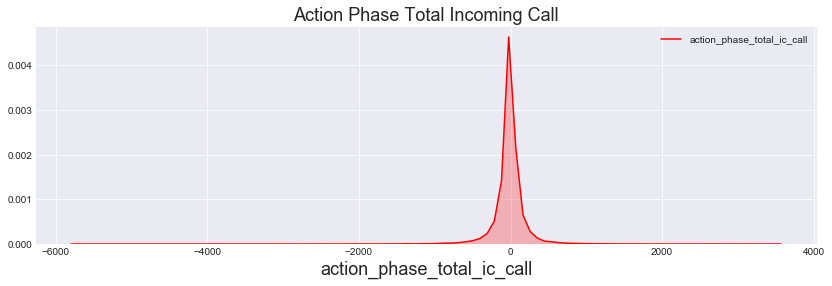

In [49]:
#Univariate Analysis

#kernel density plots to show the distribution of incoming calls in action phase
sb.set_style('darkgrid')
plt.figure(figsize=(14,4))
plt.title('Action Phase Total Incoming Call',fontsize=18)
plt.xlabel('action_phase_total_ic_call',fontsize=18)
sb.kdeplot(data=churn_HVC_df['action_phase_total_ic_call'],shade=True,color='red')

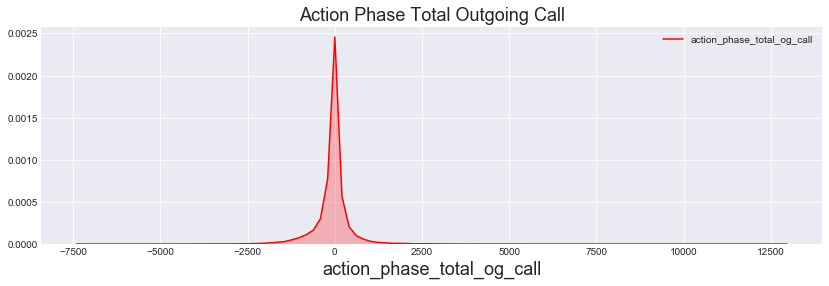

In [50]:
#Univariate Analysis

#kernel density plots to show the distribution of outgoing calls in action phase
sb.set_style('darkgrid')
plt.figure(figsize=(14,4))
plt.title('Action Phase Total Outgoing Call',fontsize=18)
plt.xlabel('action_phase_total_og_call',fontsize=18)
sb.kdeplot(data=churn_HVC_df['action_phase_total_og_call'],shade=True,color='red')

### Observation :

From above two plots , total incoming & Outgoing Call in action phase is tending to zero i.e. incoming and outgoing calls for Churn and Non Churn are low.

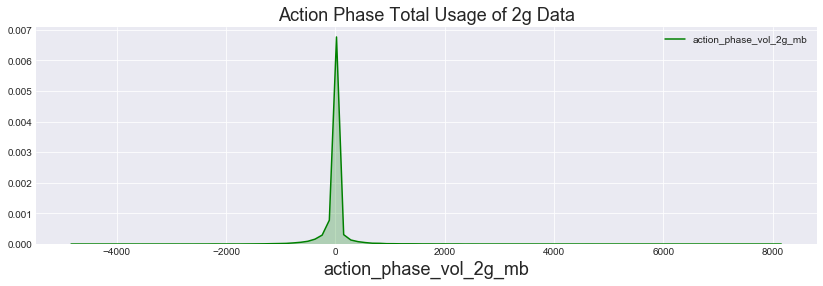

In [51]:
#Univariate Analysis

#kernel density plots to show the distribution of volumns of 2g data in action phase
sb.set_style('darkgrid')
plt.figure(figsize=(14,4))
plt.title('Action Phase Total Usage of 2g Data',fontsize=18)
plt.xlabel('action_phase_vol_2g_mb',fontsize=18)
sb.kdeplot(data=churn_HVC_df['action_phase_vol_2g_mb'],shade=True,color='green')

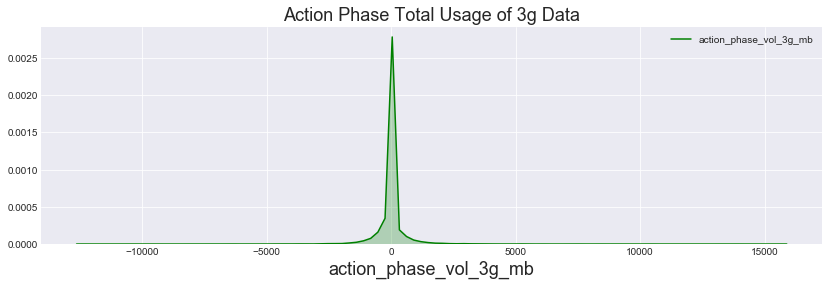

In [52]:
#Univariate Analysis

#kernel density plots to show the distribution of volumns of 3g data in action phase
sb.set_style('darkgrid')
plt.figure(figsize=(14,4))
plt.title('Action Phase Total Usage of 3g Data',fontsize=18)
plt.xlabel('action_phase_vol_3g_mb',fontsize=18)
sb.kdeplot(data=churn_HVC_df['action_phase_vol_3g_mb'],shade=True,color='green')

### Observation :

From above two plots , usages of data (3g & 2g) in action phase is tending to zero i.e Usage of internet data for Churn and Non Churn are low.

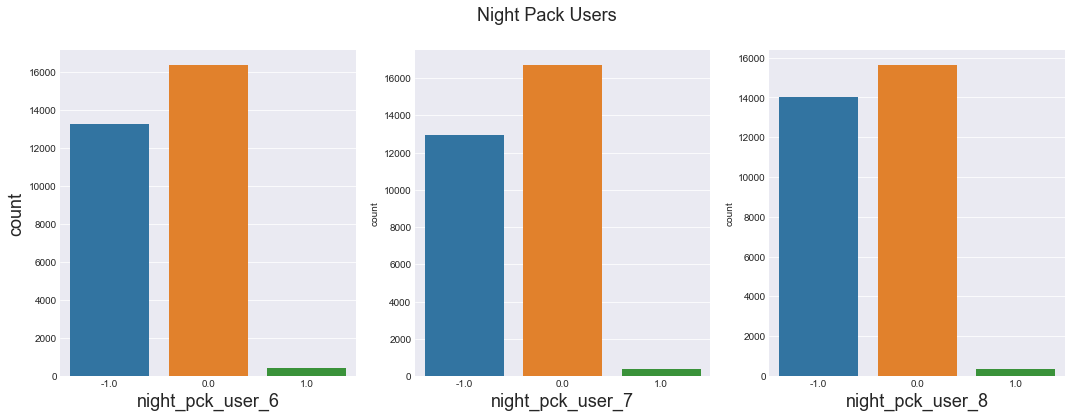

In [53]:
#Comparative Analysis by using subplots

plt.figure(figsize=(18,6))
plt.suptitle('Night Pack Users',fontsize=18)
plt.subplot(131)
plt.xlabel('night_pck_user_6',fontsize=18)
plt.ylabel('Count',fontsize=18)
sb.countplot(churn_HVC_df['night_pck_user_6'])

plt.subplot(132)
plt.xlabel('night_pck_user_7',fontsize=18)
sb.countplot(churn_HVC_df['night_pck_user_7'])

plt.subplot(133)
plt.xlabel('night_pck_user_8',fontsize=18)
sb.countplot(churn_HVC_df['night_pck_user_8'])

### Observation :

From Above Plot , it can be observed that night pack users i.e non churn was a bit increased from 6th to 7th month but  there was a visible drop from 7th to 8th month i.e increase in number of churn.

However unknown Cat . of User (-1) is visibility increased from 7th to 8th Month.

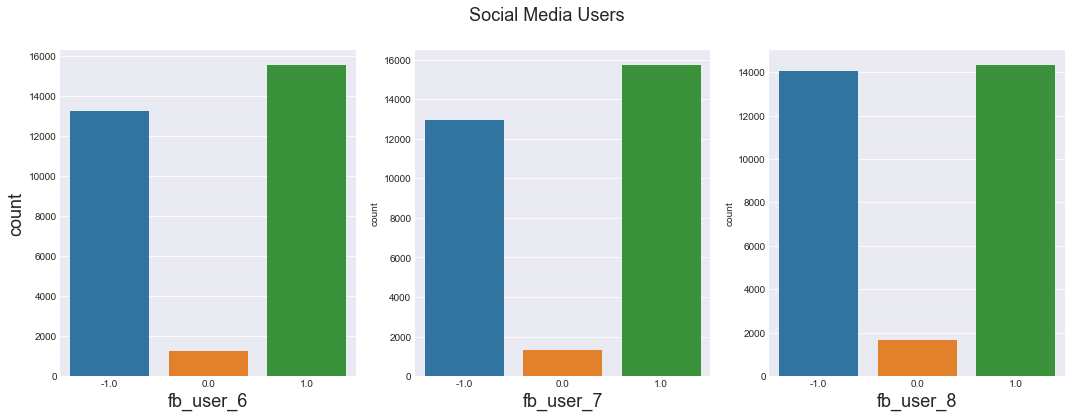

In [54]:
#Comparative Analysis by using subplots

plt.figure(figsize=(18,6))
plt.suptitle('Social Media Users',fontsize=18)
plt.subplot(131)
plt.xlabel('fb_user_6',fontsize=18)
plt.ylabel('Count',fontsize=18)
sb.countplot(churn_HVC_df['fb_user_6'])

plt.subplot(132)
plt.xlabel('fb_user_7',fontsize=18)
sb.countplot(churn_HVC_df['fb_user_7'])

plt.subplot(133)
plt.xlabel('fb_user_8',fontsize=18)
sb.countplot(churn_HVC_df['fb_user_8'])

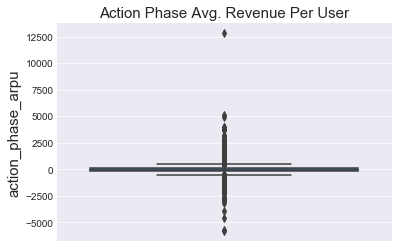

In [55]:
#Univariate Analysis

plt.title('Action Phase Avg. Revenue Per User',fontsize=15)
plt.ylabel('action_phase_arpu',fontsize=15)
sb.boxplot(y=churn_HVC_df['action_phase_arpu'])

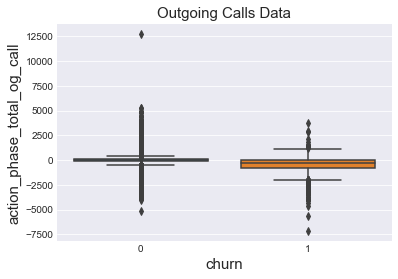

In [56]:
#Bivariate Analysis

plt.title('Outgoing Calls Data',fontsize=15)
plt.ylabel('action_phase_total_og_call',fontsize=15)
plt.xlabel('churn',fontsize=15)
sb.boxplot(x=churn_HVC_df['churn'],y=churn_HVC_df['action_phase_total_og_call'])

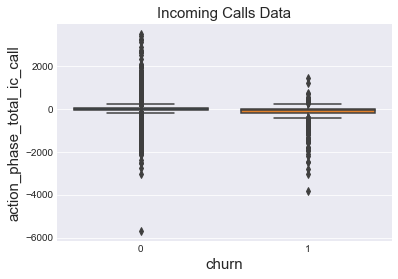

In [57]:
#Bivariate Analysis

plt.title('Incoming Calls Data',fontsize=15)
plt.ylabel('action_phase_total_ic_call',fontsize=15)
plt.xlabel('churn',fontsize=15)
sb.boxplot(x=churn_HVC_df['churn'],y=churn_HVC_df['action_phase_total_ic_call'])

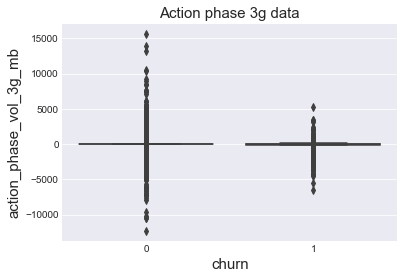

In [58]:
#Bivariate Analysis

plt.title('Action phase 3g data',fontsize=15)
plt.ylabel('action_phase_vol_3g_mb',fontsize=15)
plt.xlabel('churn',fontsize=15)
sb.boxplot(x=churn_HVC_df['churn'],y=churn_HVC_df['action_phase_vol_3g_mb'])

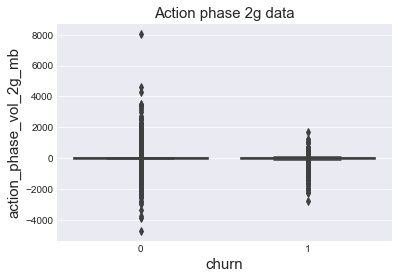

In [59]:
#Bivariate Analysis

plt.title('Action phase 2g data',fontsize=15)
plt.ylabel('action_phase_vol_2g_mb',fontsize=15)
plt.xlabel('churn',fontsize=15)
sb.boxplot(x=churn_HVC_df['churn'],y=churn_HVC_df['action_phase_vol_2g_mb'])

### Outlier Treatment

In [60]:
cat_columns =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
             'fb_user_6','fb_user_7','fb_user_8','churn']

In [61]:
#Extract all numeric columns for Outlier Treatment
numeric_col = [col for col in churn_HVC_df.columns if col not in cat_columns]

In [62]:
#check numeric column statistics
churn_HVC_df[numeric_col].describe([0.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,action_phase_total_ic_call,action_phase_total_og_call,action_phase_vol_2g_mb,action_phase_vol_3g_mb,action_phase_arpu
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

In [63]:
#function to create detect outliers (We want to cap up to 99% data that means upto 3 standard deviation from both the sides)

def detect_outliers(X):
    lower_data = X.mean()-3*X.std()
    upper_data = X.mean()+3*X.std()
    X[X<lower_data] = lower_data
    X[X>upper_data] = upper_data
    return X

In [64]:
#apply function to cap upto 99% data
churn_HVC_df[numeric_col]=churn_HVC_df[numeric_col].apply(detect_outliers)

In [65]:
#check numeric column statistics after removing outliers
churn_HVC_df[numeric_col].describe([0.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,action_phase_total_ic_call,action_phase_total_og_call,action_phase_vol_2g_mb,action_phase_vol_3g_mb,action_phase_arpu
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

## Step 6: Modeling

- Need two models, one with good predictions and other with good interpretability.
- Use PCA to reduce the variables.
- You need to handle the imbalance class.

In [66]:
#import necessary libraries

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [67]:
#create train and test split

X = churn_HVC_df.drop('churn',axis=1)
y = churn_HVC_df['churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [68]:
#check train and test dataset shape
print(X_train.shape)
print(y_train.shape)

(22500, 160)
(22500,)


In [69]:
print(X_test.shape)
print(y_test.shape)

(7501, 160)
(7501,)


In [70]:
#Use PCA to reduce the variables

#create Pipeline
estimators = []    #create empty list
estimators.append(('standard_scalar',StandardScaler())) #append StandardScalar to Pipeline
estimators.append(('pca',PCA()))   #append PCA to Pipeline
pipeline_model = Pipeline(estimators)  

In [71]:
pipeline_model.fit_transform(X_train)

array([[ 3.16631154e+00, -5.36752680e+00,  2.35404380e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  4.53543924e-14],
       [ 1.00220491e+01,  4.68296491e+00, -9.57237184e-01, ...,
        -3.19762604e-15,  6.53082727e-15,  1.30719952e-16],
       [-3.76450617e+00, -6.41030432e-01, -4.69815522e-01, ...,
        -9.40392078e-15,  1.82276722e-14, -1.84983652e-16],
       ...,
       [ 2.43785170e+00, -4.23790210e+00,  3.19937874e-01, ...,
         7.54579598e-18, -4.83531595e-18, -2.86580841e-17],
       [ 4.88890093e+00, -6.51783030e+00,  3.00906703e+00, ...,
         1.83127101e-17,  4.49808385e-17, -1.57053001e-17],
       [ 9.02664372e+00, -3.76917809e+00,  3.75931670e+00, ...,
         8.76908951e-18,  2.23274420e-17, -1.56127957e-17]])

In [72]:
churn_HVC_pca=pipeline_model.named_steps['pca']

#create data frame of explained variance
pca_df = pd.DataFrame(np.round(churn_HVC_pca.explained_variance_ratio_.cumsum(),2),columns=['variance_ratio'])
pca_df

,variance_ratio
0,0.13
1,0.23
2,0.30
3,0.35
4,0.39
5,0.42
6,0.45
7,0.48
8,0.50
9,0.52


In [73]:
pca_df.loc[51,:]

variance_ratio    0.9
Name: 51, dtype: float64

In [74]:
pca_df.loc[69,:]

variance_ratio    0.95
Name: 69, dtype: float64

### from the above dataframe around 51 columns explaining 90 % variance and around 69 columns explaining 95% variance

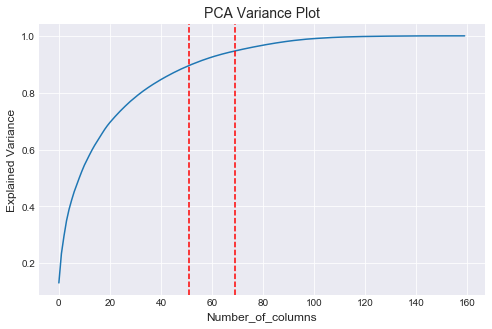

In [75]:
plt.figure(figsize=(8,5))
plt.xlabel('Number_of_columns',fontsize=12)
plt.ylabel('Explained Variance',fontsize=12)
plt.title('PCA Variance Plot',fontsize=14)
plt.plot(churn_HVC_pca.explained_variance_ratio_.cumsum())
plt.axvline(x=51,color='red',linestyle='dashed')
plt.axvline(x=69,color='red',linestyle='dashed')

In [76]:
#Now create a Pipeline with 51 PCA components with Logistic Regression
estimators2 = []
estimators2.append(('Standard_Scalar',StandardScaler()))
estimators2.append(('pca',PCA(n_components=51)))
estimators2.append(('logistic',LogisticRegression(class_weight={0:0.1, 1: 0.9})))
pipeline_model2 = Pipeline(estimators2)

In [77]:
#fit the model
pipeline_model2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Standard_Scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=51,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [78]:
#check score with 51 PCA components
pipeline_model2.score(X_train,y_train)

0.8416

In [79]:
#Predict test data
y_pred=pipeline_model2.predict(X_test)

#create confusion matrix
confusion_matrix(y_test,y_pred)

array([[5891, 1044],
       [ 101,  465]], dtype=int64)

In [80]:
#print classification report
print(classification_report(y_test,y_pred)) #accuracy, precision and recall to evaluate class imbalance

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6935
           1       0.31      0.82      0.45       566

    accuracy                           0.85      7501
   macro avg       0.65      0.84      0.68      7501
weighted avg       0.93      0.85      0.88      7501



In [81]:
#ROC-AOC SCORE

y_prob=pipeline_model2.predict_proba(X_test)
roc_auc_score(y_test,y_prob[:,1])

0.9026497945332862

In [82]:
#Now create a Pipeline with 51 PCA components with Random Forest default parameters
estimators3 = []
estimators3.append(('Standard_Scalar',StandardScaler()))
estimators3.append(('pca',PCA(n_components=51)))
estimators3.append(('rfc',RandomForestClassifier()))
pipeline_model3 = Pipeline(estimators3)

In [83]:
#fit the model
pipeline_model3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Standard_Scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=51,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1

In [84]:
#check score with 51 PCA components
pipeline_model3.score(X_train,y_train)

0.9980888888888889

In [85]:
#Predict test data
y_pred=pipeline_model3.predict(X_test)

#create confusion matrix
confusion_matrix(y_test,y_pred)

array([[6885,   50],
       [ 486,   80]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))  #Sensitivity of class 1 is too low

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6935
           1       0.62      0.14      0.23       566

    accuracy                           0.93      7501
   macro avg       0.77      0.57      0.60      7501
weighted avg       0.91      0.93      0.91      7501



## Hyperparameter Tunning 

### 1st MACHINE LEARNING MODEL -- LOGISTIC REGRESSION

In [87]:
#PCA with Logistic Regression

estimator4 = []
estimator4.append(('standard_scalar',StandardScaler()))
estimator4.append(('pca',PCA()))
estimator4.append(('logistic',LogisticRegression(class_weight={0:0.1, 1: 0.9})))
pipeline_model4=Pipeline(estimator4)

#provide params
params = [{'pca__n_components':[51,69],'logistic__penalty':['l1','l2']}]

#create K-Folds
skf = StratifiedKFold(n_splits=5)

#Use of Grid Search for Hyperparameter Tunning
grid_search_model=GridSearchCV(estimator=pipeline_model4,param_grid=params,cv=skf,scoring='roc_auc',
                               verbose=1)

In [88]:
#fit the model of best hyper parameters
grid_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scalar',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegre...
                                                           l1_ratio=None,
            

In [89]:
#check best parameters
print("Best Parameters:   ",grid_search_model.best_params_)
print("Best ROC_AUC:   ",grid_search_model.best_score_)

Best Parameters:    {'logistic__penalty': 'l2', 'pca__n_components': 69}
Best ROC_AUC:    0.8907139878787879


In [90]:
#test the data

y_pred=grid_search_model.predict(X_test)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [91]:
#print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6935
           1       0.31      0.82      0.45       566

    accuracy                           0.85      7501
   macro avg       0.64      0.83      0.68      7501
weighted avg       0.93      0.85      0.88      7501



In [92]:
#ROC-AOC SCORE, ACCURACY, SENSITIVITY, 

y_prob=grid_search_model.predict_proba(X_test)
logistic_metrics = []
logistic_metrics.append(['ACCURACY: ',(tp+tn)/(tp+fn+fp+tn)])
logistic_metrics.append(['SENSITIVITY: ',(tp)/(tp+fn)])
logistic_metrics.append(['SPECIFICITY: ',(tn)/(fp+tn)])
logistic_metrics.append(['ROC AOC SCORE: ',roc_auc_score(y_test,y_prob[:,1])])

print("ACCURACY:  ",(tp+tn)/(tp+fn+fp+tn))
print("SENSITIVITY:  ",(tp)/(tp+fn))
print("SPECIFICITY:  ",(tn)/(fp+tn))
print("ROC AOC SCORE: ",roc_auc_score(y_test,y_prob[:,1]))

ACCURACY:   0.8466871083855486
SENSITIVITY:   0.8197879858657244
SPECIFICITY:   0.8488824801730354
ROC AOC SCORE:  0.90044354314801


### 2nd MACHINE LEARNING MODEL  --  RANDOM FOREST CLASSIFIER

In [93]:
estimator5 = []
estimator5.append(('standard_scalar',StandardScaler()))
estimator5.append(('pca',PCA()))
estimator5.append(('rfc',RandomForestClassifier(class_weight={0:0.1, 1: 0.9})))
pipeline_model5=Pipeline(estimator5)


#provide params
params = [{'pca__n_components':[51,69],'rfc__criterion':['gini','entropy']}]

#create K-Folds
skf = StratifiedKFold(n_splits=5)

#Use of Grid Search for Hyperparameter Tunning
grid_search_model2=GridSearchCV(estimator=pipeline_model5,param_grid=params,cv=skf,scoring='roc_auc',
                               verbose=1)

In [94]:
#fit the model of best hyper parameters
grid_search_model2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scalar',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('rfc',
                                        RandomForestClassi...
                                                               min_samples_split=2,
  

In [95]:
#check best parameters
print("Best Parameters:   ",grid_search_model2.best_params_)
print("Best ROC_AUC:   ",grid_search_model2.best_score_)

Best Parameters:    {'pca__n_components': 69, 'rfc__criterion': 'entropy'}
Best ROC_AUC:    0.8842559353535353


In [96]:
#test the data

y_pred=grid_search_model2.predict(X_test)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [97]:
#ROC-AOC SCORE, ACCURACY, SENSITIVITY, 

y_prob=grid_search_model2.predict_proba(X_test)

rfc_metrics = []
rfc_metrics.append(['ACCURACY: ',(tp+tn)/(tp+fn+fp+tn)])
rfc_metrics.append(['SENSITIVITY: ',(tp)/(tp+fn)])
rfc_metrics.append(['SPECIFICITY: ',(tn)/(fp+tn)])
rfc_metrics.append(['ROC AOC SCORE: ',roc_auc_score(y_test,y_prob[:,1])])

print("ACCURACY:  ",(tp+tn)/(tp+fn+fp+tn))
print("SENSITIVITY:  ",(tp)/(tp+fn))
print("SPECIFICITY:  ",(tn)/(fp+tn))
print("ROC AOC SCORE: ",roc_auc_score(y_test,y_prob[:,1]))

ACCURACY:   0.9282762298360219
SENSITIVITY:   0.12014134275618374
SPECIFICITY:   0.9942321557317952
ROC AOC SCORE:  0.8877653679675737


### 3rd MACHINE LEARNING MODEL  --  SVM

In [98]:
#PCA with SVM

estimator6 = []
estimator6.append(('standard_scalar',StandardScaler()))
estimator6.append(('pca',PCA()))
estimator6.append(('svm',SVC(class_weight={0:0.1, 1: 0.9},probability=True)))
pipeline_model6=Pipeline(estimator6)

#provide params
params = [{'pca__n_components':[51,69],'svm__kernel':['linear','rbf']}]

#create K-Folds
skf = StratifiedKFold(n_splits=5)

#Use of Grid Search for Hyperparameter Tunning
grid_search_model3=GridSearchCV(estimator=pipeline_model6,param_grid=params,cv=skf,scoring='roc_auc',
                               verbose=1)

In [99]:
#fit the model of best hyper parameters
grid_search_model3.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 49.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scalar',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svm',
                                        SVC(C=1.0, break_ti...
                                            decision_function_shape='ovr',
          

In [100]:
#check best parameters
print("Best Parameters:   ",grid_search_model3.best_params_)
print("Best ROC_AUC:   ",grid_search_model3.best_score_)

Best Parameters:    {'pca__n_components': 69, 'svm__kernel': 'rbf'}
Best ROC_AUC:    0.896881907070707


In [101]:
#test the data

y_pred=grid_search_model3.predict(X_test)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [102]:
#ROC-AOC SCORE, ACCURACY, SENSITIVITY, 

y_prob=grid_search_model3.predict_proba(X_test)

svm_metrics = []
svm_metrics.append(['ACCURACY: ',(tp+tn)/(tp+fn+fp+tn)])
svm_metrics.append(['SENSITIVITY: ',(tp)/(tp+fn)])
svm_metrics.append(['SPECIFICITY: ',(tn)/(fp+tn)])
svm_metrics.append(['ROC AOC SCORE: ',roc_auc_score(y_test,y_prob[:,1])])

print("ACCURACY:  ",(tp+tn)/(tp+fn+fp+tn))
print("SENSITIVITY:  ",(tp)/(tp+fn))
print("SPECIFICITY:  ",(tn)/(fp+tn))
print("ROC AOC SCORE: ",roc_auc_score(y_test,y_prob[:,1]))

ACCURACY:   0.8853486201839754
SENSITIVITY:   0.7773851590106007
SPECIFICITY:   0.8941600576784426
ROC AOC SCORE:  0.9111722684900936


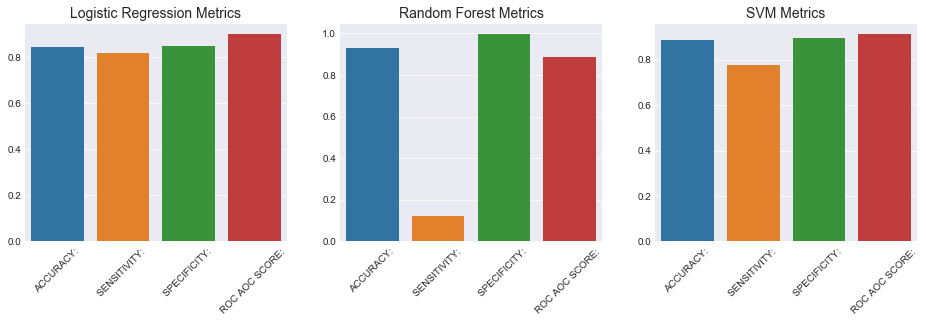

In [103]:
names=[i[0] for i in logistic_metrics]
log_data=[i[1] for i in logistic_metrics]
rfc_data = [i[1] for i in rfc_metrics]
svm_data = [i[1] for i in svm_metrics]

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.xticks(rotation=45)
plt.title('Logistic Regression Metrics',fontsize=14)
sb.barplot(x=names,y=log_data)

plt.subplot(132)
plt.xticks(rotation=45)
plt.title('Random Forest Metrics',fontsize=14)
sb.barplot(x=names,y=rfc_data)

plt.subplot(133)
plt.xticks(rotation=45)
plt.title('SVM Metrics',fontsize=14)
sb.barplot(x=names,y=svm_data)

### From the above graph metrics we can see it clearly that from the 3 ML models LogisticRegression and SVM models are the better performer than Random Forest Classifier. RFC's sensitivity is too low that's why its a bad model.

### Now from the Logistic and SVM..we choose Logistic with PCA because all the metrics in Logistic model are in a close proximity and moreover SVM is time consuming to find appropriate Kernel for the given data.

## Feature Selection using RFE  -- Top Important Features

In [104]:
# load necessary libraries

from sklearn.feature_selection import RFE

In [105]:
#Create Logistic Regression with RFE for upto 15 top important features

log_rfe_model = LogisticRegression(class_weight={0:0.1, 1: 0.9})
rfe=RFE(log_rfe_model,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9},
                                 dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None,
                                 max_iter=100, multi_class='auto', n_jobs=None,
                                 penalty='l2', random_state=None,
                                 solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [106]:
#check support

rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,

In [107]:
#check ranking

rfe.ranking_

array([146, 145, 144,  86, 111,  29,  52,  40,  18,  51,  84,  44,  96,
         9,  41,  85,  97,   1,  50, 125,  23,  46,  45,  16,  24,  10,
       134,  70,  80,  12,  49,  43,  15, 103,  42,  53, 123,  94,  17,
       108,  25,   1, 140, 142, 138, 126, 130,  14,  27,  28,   1,   1,
         1, 122, 136, 132, 115,  48, 128,  13,  54, 129,  20,  33,  68,
        21,   8,  59,  83,  57, 137,   5,  37,  38, 127,  64,  30,  39,
        19,  66,   7, 143, 141, 139,  32,  87,   4,  31,  60,   3, 131,
       135, 112,  95,  67,   2, 104,  73,   6, 106,  35,   1,  88, 119,
        69, 109,  81,  58, 113,  61,   1,  74, 114,   1,  92,  91, 121,
       105,  34,   1,   1,   1, 110,  55,  62,  22,  71,  63, 124, 117,
       118, 116,  89,  72,   1,  75,  77, 101,  78,  99,   1,  82, 102,
       100,  79,  76, 120,  93,  56,   1,  98,  65,  90, 133,   1,  11,
        47,  36, 107,  26])

In [108]:
#check all the columns and ranking of each columns

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 146),
 ('std_og_t2o_mou', False, 145),
 ('loc_ic_t2o_mou', False, 144),
 ('arpu_6', False, 86),
 ('arpu_7', False, 111),
 ('arpu_8', False, 29),
 ('onnet_mou_6', False, 52),
 ('onnet_mou_7', False, 40),
 ('onnet_mou_8', False, 18),
 ('offnet_mou_6', False, 51),
 ('offnet_mou_7', False, 84),
 ('offnet_mou_8', False, 44),
 ('roam_ic_mou_6', False, 96),
 ('roam_ic_mou_7', False, 9),
 ('roam_ic_mou_8', False, 41),
 ('roam_og_mou_6', False, 85),
 ('roam_og_mou_7', False, 97),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 50),
 ('loc_og_t2t_mou_7', False, 125),
 ('loc_og_t2t_mou_8', False, 23),
 ('loc_og_t2m_mou_6', False, 46),
 ('loc_og_t2m_mou_7', False, 45),
 ('loc_og_t2m_mou_8', False, 16),
 ('loc_og_t2f_mou_6', False, 24),
 ('loc_og_t2f_mou_7', False, 10),
 ('loc_og_t2f_mou_8', False, 134),
 ('loc_og_t2c_mou_6', False, 70),
 ('loc_og_t2c_mou_7', False, 80),
 ('loc_og_t2c_mou_8', False, 12),
 ('loc_og_mou_6', False, 49),
 ('loc_og_mou_7', False, 43)

In [109]:
#extract top features columns

col=X_train.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'night_pck_user_8', 'sachet_2g_8', 'fb_user_8',
       'sep_vbc_3g'],
      dtype='object')

In [110]:
#columns which are eliminated by RFE
e_col = X_train.columns[~rfe.support_]
e_col

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'fb_user_7', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'action_phase_total_ic_call', 'action_phase_total_og_call',
       'action_phase_vol_2g_mb', 'action_phase_vol_3g_mb',
       'action_phase_arpu'],
      dtype='object', length=145)

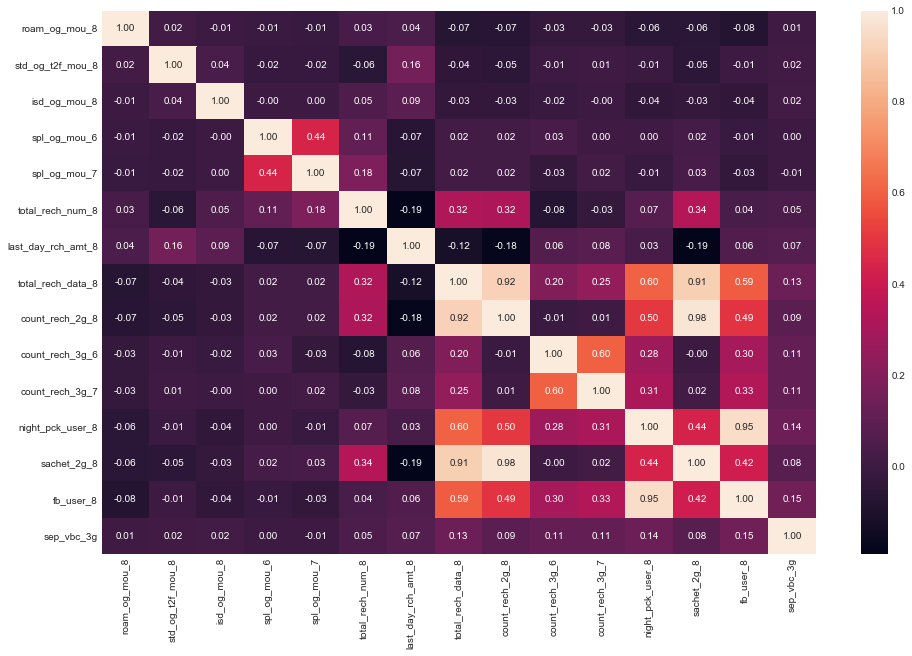

In [111]:
plt.figure(figsize=(16,10))
sb.heatmap(X_train[col].corr(),annot=True,fmt='.2f')

In [112]:
X_train2=X_train[col]
X_test2 = X_test[col]

In [113]:
drop_columns = ['fb_user_8','sachet_2g_8']
X_train2=X_train2.drop(drop_columns,axis=1)
X_test2 = X_test2.drop(drop_columns,axis=1)

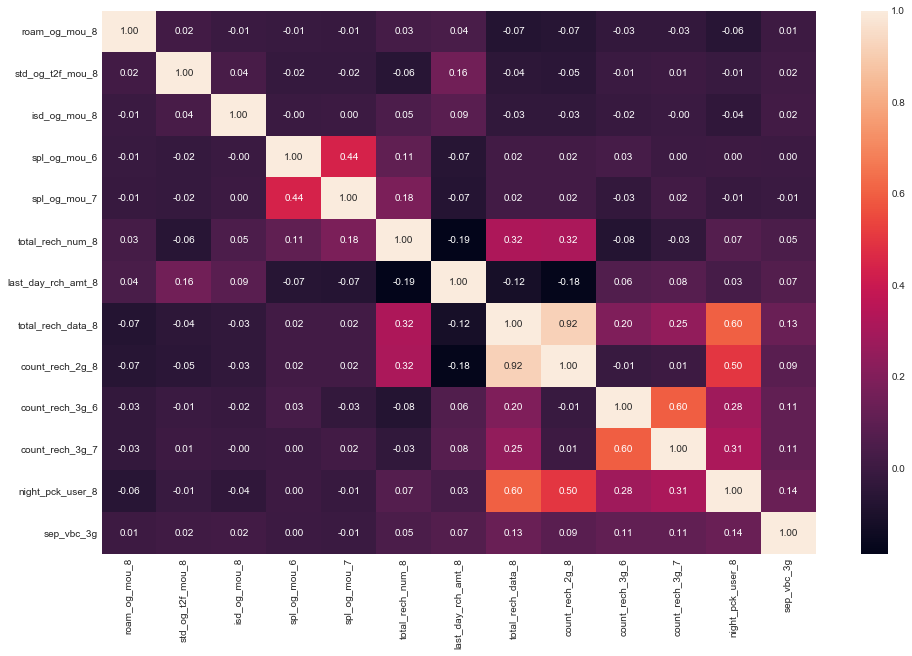

In [114]:
plt.figure(figsize=(16,10))
sb.heatmap(X_train2.corr(),annot=True,fmt='.2f')

In [115]:
#Logistic Regression without PCA and with top selected features

estimator7 = []
estimator7.append(('standard_scalar',StandardScaler()))
estimator7.append(('logistic',LogisticRegression(class_weight={0:0.1, 1: 0.9})))
pipeline_model7=Pipeline(estimator7)

#provide params
params = [{'logistic__C':[0.1,0.5,1,2,5,10],'logistic__penalty':['l1','l2']}]

#create K-Folds
skf = StratifiedKFold(n_splits=5)

#Use of Grid Search for Hyperparameter Tunning
grid_search_model4=GridSearchCV(estimator=pipeline_model7,param_grid=params,cv=skf,scoring='roc_auc',
                               verbose=1)

In [116]:
grid_search_model4.fit(X_train2,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scalar',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio

In [117]:
#check best parameters
print("Best Parameters:   ",grid_search_model4.best_params_)
print("Best ROC_AUC:   ",grid_search_model4.best_score_)

Best Parameters:    {'logistic__C': 10, 'logistic__penalty': 'l2'}
Best ROC_AUC:    0.8483766303030302


In [118]:
#test the data

y_pred=grid_search_model4.predict(X_test2)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [119]:
#ROC-AOC SCORE, ACCURACY, SENSITIVITY, 

y_prob=grid_search_model4.predict_proba(X_test2)

svm_metrics = []
svm_metrics.append(['ACCURACY: ',(tp+tn)/(tp+fn+fp+tn)])
svm_metrics.append(['SENSITIVITY: ',(tp)/(tp+fn)])
svm_metrics.append(['SPECIFICITY: ',(tn)/(fp+tn)])
svm_metrics.append(['ROC AOC SCORE: ',roc_auc_score(y_test,y_prob[:,1])])

print("ACCURACY:  ",(tp+tn)/(tp+fn+fp+tn))
print("SENSITIVITY:  ",(tp)/(tp+fn))
print("SPECIFICITY:  ",(tn)/(fp+tn))
print("ROC AOC SCORE: ",roc_auc_score(y_test,y_prob[:,1]))

ACCURACY:   0.8140247966937741
SENSITIVITY:   0.7826855123674912
SPECIFICITY:   0.8165825522710887
ROC AOC SCORE:  0.8520903340203454


In [120]:
lr_model=grid_search_model4.best_estimator_.named_steps['logistic']
company_df=pd.DataFrame(lr_model.coef_,columns=X_train2.columns)

In [121]:
company_df.insert(0,"intercept_",lr_model.intercept_)

In [122]:
company_df

,intercept_,roam_og_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,night_pck_user_8,sep_vbc_3g
0,-1.229634,0.470467,-0.327261,0.094479,0.095527,0.077816,-0.901862,-0.903039,-0.336425,0.149159,0.120763,0.140687,-0.597224,-0.926209


# Business Insights

- From the above analysis of model it has been observed that the call rates and the data users are in decreasing trend.

- As a result the number of churns has been increase in the 9th month.

- Increasing the number of churns give us the following interpretation
  1. The users may be moving to new telecom services - not happy with the current services provided by the present telecom company.
  2. Other telecom services may put a better call rates and internet packs to the customers.

- Suggestions to the Business
  1. Re-look the business model to retain the high value customers.
  2. Provide special discounts at call rate and internet pacakages for the high value customers
  3. Focus and regulate on your STD call rate plan
  4. Comfortable rates of night packs to the high value customers